In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import initializers

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
#load the data
data = pd.read_csv('outputs/density-data-all-100-stdev', sep=" ", header=None)
data.head()
data.columns = ['rho', 'potential', 'temp', 'stdev_pe', 'stdev_temp']

# data = data.sample(frac=1)
# print(data[0:15])
# data = data[0:15]

x = data.drop(['potential', 'temp'], axis=1)
#error_bars = data.drop(['rho', 'potential', 'temp'], axis=1)
y = data.drop(['rho', 'stdev_pe', 'stdev_temp'], axis=1)


#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
error_bars_train = x_train.drop(['rho'], axis=1)
x_train = x_train.rho
error_bars_test = x_test.drop(['rho'], axis=1)
x_test = x_test.rho

# x_train = [x_train[0:2]]
# y_train = [y_train[0:2]]
# x_test = x_train
# y_test = y_train
#print(x)
#print(y,"\n\n")
print("\n test data:", x_test.shape, "\n", y_test)
# print("\n train data:",x_train,"\n",y_train)


 test data: (169,) 
      potential   temp
34      -3.486  0.682
167     -3.537  0.716
541     -3.890  0.942
218     -3.578  0.743
138     -3.510  0.697
..         ...    ...
288     -3.620  0.771
452     -3.685  0.815
829     -5.047  1.122
417     -3.667  0.802
628     -4.255  1.132

[169 rows x 2 columns]


In [4]:
#Normalization
x_train_reshape = x_train.values.reshape((-1,1))
x_test_reshape = x_test.values.reshape((-1,1))

y_train_reshape = y_train.values.reshape((-1,2))
y_test_reshape = y_test.values.reshape((-1,2))

# print(y_train_reshape)

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(x_train_reshape)
xtrain_scale=scaler_x.transform(x_train_reshape)
scaler_x.fit(x_test_reshape)
xtest_scale=scaler_x.transform(x_test_reshape)
scaler_y.fit(y_train_reshape)
ytrain_scale=scaler_y.transform(y_train_reshape)
scaler_y.fit(y_test_reshape)
ytest_scale=scaler_y.transform(y_test_reshape)
# print(xtrain_scale)
# print(ytrain_scale)

In [ ]:
def custom_accuracy (y_actual, y_predicted):
  # predictions_transformed = scaler_y.inverse_transform(y_predicted)
  lower_limit = y_actual - error_bars_test.stdev_pe
  upper_limit = y_actual + error_bars_test.stdev_pe
  hits = 0
  filter = tf.math.logical_and(y_predicted >= lower_limit, y_predicted < upper_limit, name="and")
  hits = tf.sum(filter)

  return hits/169
# print("Accuracy:",acc*100, "% hits:", hits, " ", i)

In [5]:
#define the model
model = keras.Sequential()
model.add(Dense(1, input_dim=1, kernel_initializer= tf.keras.initializers.Ones(), activation='relu', name='input_layer'))
model.add(Dense(5, activation='relu', name="hidden_layer"))
model.add(Dense(2, activation='linear', name="output_layer"))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.summary()
# 'random_uniform'

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 1)                 2         
_________________________________________________________________
hidden_layer (Dense)         (None, 5)                 10        
_________________________________________________________________
output_layer (Dense)         (None, 2)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [6]:
#compile the model
model.compile(loss='mse', optimizer=opt, metrics=['mae', 'accuracy'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=600, batch_size=5, verbose=1, validation_split=0.2)
# think about supplying error_bars here


Train on 538 samples, validate on 135 samples
Epoch 1/600
538/538 [==============================] - 0s 358us/sample - loss: 0.5700 - mean_absolute_error: 0.6136 - acc: 0.6599 - val_loss: 0.4710 - val_mean_absolute_error: 0.5524 - val_acc: 0.5037
Epoch 2/600
538/538 [==============================] - 0s 149us/sample - loss: 0.3648 - mean_absolute_error: 0.4915 - acc: 0.6803 - val_loss: 0.3376 - val_mean_absolute_error: 0.4715 - val_acc: 0.6222
Epoch 3/600
538/538 [==============================] - 0s 140us/sample - loss: 0.2795 - mean_absolute_error: 0.4295 - acc: 0.6952 - val_loss: 0.2718 - val_mean_absolute_error: 0.4275 - val_acc: 0.6222
Epoch 4/600
538/538 [==============================] - 0s 145us/sample - loss: 0.2289 - mean_absolute_error: 0.3913 - acc: 0.6952 - val_loss: 0.2279 - val_mean_absolute_error: 0.3976 - val_acc: 0.6222
Epoch 5/600
538/538 [==============================] - 0s 150us/sample - loss: 0.1930 - mean_absolute_error: 0.3660 - acc: 0.6952 - val_loss: 0.1957 -

538/538 [==============================] - 0s 148us/sample - loss: 0.0060 - mean_absolute_error: 0.0618 - acc: 0.9963 - val_loss: 0.0070 - val_mean_absolute_error: 0.0669 - val_acc: 1.0000
Epoch 42/600
538/538 [==============================] - 0s 147us/sample - loss: 0.0060 - mean_absolute_error: 0.0614 - acc: 0.9926 - val_loss: 0.0070 - val_mean_absolute_error: 0.0662 - val_acc: 1.0000
Epoch 43/600
538/538 [==============================] - 0s 144us/sample - loss: 0.0059 - mean_absolute_error: 0.0612 - acc: 0.9944 - val_loss: 0.0069 - val_mean_absolute_error: 0.0652 - val_acc: 1.0000
Epoch 44/600
538/538 [==============================] - 0s 162us/sample - loss: 0.0059 - mean_absolute_error: 0.0608 - acc: 0.9944 - val_loss: 0.0069 - val_mean_absolute_error: 0.0660 - val_acc: 1.0000
Epoch 45/600
538/538 [==============================] - 0s 147us/sample - loss: 0.0058 - mean_absolute_error: 0.0601 - acc: 0.9944 - val_loss: 0.0070 - val_mean_absolute_error: 0.0655 - val_acc: 1.0000
Epo

Epoch 82/600
538/538 [==============================] - 0s 150us/sample - loss: 0.0036 - mean_absolute_error: 0.0455 - acc: 0.9907 - val_loss: 0.0046 - val_mean_absolute_error: 0.0510 - val_acc: 1.0000
Epoch 83/600
538/538 [==============================] - 0s 148us/sample - loss: 0.0036 - mean_absolute_error: 0.0453 - acc: 0.9907 - val_loss: 0.0044 - val_mean_absolute_error: 0.0503 - val_acc: 1.0000
Epoch 84/600
538/538 [==============================] - 0s 149us/sample - loss: 0.0035 - mean_absolute_error: 0.0448 - acc: 0.9944 - val_loss: 0.0042 - val_mean_absolute_error: 0.0490 - val_acc: 1.0000
Epoch 85/600
538/538 [==============================] - 0s 149us/sample - loss: 0.0035 - mean_absolute_error: 0.0443 - acc: 0.9926 - val_loss: 0.0042 - val_mean_absolute_error: 0.0489 - val_acc: 1.0000
Epoch 86/600
538/538 [==============================] - 0s 148us/sample - loss: 0.0035 - mean_absolute_error: 0.0440 - acc: 0.9944 - val_loss: 0.0042 - val_mean_absolute_error: 0.0503 - val_ac

538/538 [==============================] - 0s 150us/sample - loss: 0.0019 - mean_absolute_error: 0.0327 - acc: 0.9963 - val_loss: 0.0020 - val_mean_absolute_error: 0.0340 - val_acc: 1.0000
Epoch 123/600
538/538 [==============================] - 0s 150us/sample - loss: 0.0018 - mean_absolute_error: 0.0322 - acc: 0.9926 - val_loss: 0.0020 - val_mean_absolute_error: 0.0337 - val_acc: 1.0000
Epoch 124/600
538/538 [==============================] - 0s 149us/sample - loss: 0.0018 - mean_absolute_error: 0.0316 - acc: 0.9981 - val_loss: 0.0019 - val_mean_absolute_error: 0.0328 - val_acc: 1.0000
Epoch 125/600
538/538 [==============================] - 0s 151us/sample - loss: 0.0017 - mean_absolute_error: 0.0310 - acc: 0.9981 - val_loss: 0.0019 - val_mean_absolute_error: 0.0328 - val_acc: 1.0000
Epoch 126/600
538/538 [==============================] - 0s 151us/sample - loss: 0.0016 - mean_absolute_error: 0.0309 - acc: 0.9944 - val_loss: 0.0018 - val_mean_absolute_error: 0.0320 - val_acc: 1.0000

Epoch 162/600
538/538 [==============================] - 0s 148us/sample - loss: 5.9345e-04 - mean_absolute_error: 0.0190 - acc: 0.9981 - val_loss: 6.6805e-04 - val_mean_absolute_error: 0.0196 - val_acc: 1.0000
Epoch 163/600
538/538 [==============================] - 0s 149us/sample - loss: 5.6781e-04 - mean_absolute_error: 0.0188 - acc: 0.9963 - val_loss: 5.4889e-04 - val_mean_absolute_error: 0.0181 - val_acc: 1.0000
Epoch 164/600
538/538 [==============================] - 0s 151us/sample - loss: 5.5605e-04 - mean_absolute_error: 0.0184 - acc: 0.9963 - val_loss: 5.3437e-04 - val_mean_absolute_error: 0.0178 - val_acc: 1.0000
Epoch 165/600
538/538 [==============================] - 0s 150us/sample - loss: 5.3385e-04 - mean_absolute_error: 0.0182 - acc: 1.0000 - val_loss: 5.1584e-04 - val_mean_absolute_error: 0.0175 - val_acc: 1.0000
Epoch 166/600
538/538 [==============================] - 0s 150us/sample - loss: 5.0146e-04 - mean_absolute_error: 0.0177 - acc: 0.9963 - val_loss: 6.2483e-

Epoch 201/600
538/538 [==============================] - 0s 142us/sample - loss: 2.5803e-04 - mean_absolute_error: 0.0122 - acc: 0.9963 - val_loss: 2.7864e-04 - val_mean_absolute_error: 0.0126 - val_acc: 1.0000
Epoch 202/600
538/538 [==============================] - 0s 154us/sample - loss: 2.8023e-04 - mean_absolute_error: 0.0130 - acc: 0.9963 - val_loss: 2.7410e-04 - val_mean_absolute_error: 0.0126 - val_acc: 1.0000
Epoch 203/600
538/538 [==============================] - 0s 172us/sample - loss: 2.9333e-04 - mean_absolute_error: 0.0127 - acc: 0.9963 - val_loss: 2.6619e-04 - val_mean_absolute_error: 0.0122 - val_acc: 1.0000
Epoch 204/600
538/538 [==============================] - 0s 174us/sample - loss: 2.5770e-04 - mean_absolute_error: 0.0122 - acc: 0.9963 - val_loss: 3.9512e-04 - val_mean_absolute_error: 0.0138 - val_acc: 1.0000
Epoch 205/600
538/538 [==============================] - 0s 183us/sample - loss: 2.8066e-04 - mean_absolute_error: 0.0123 - acc: 1.0000 - val_loss: 2.6128e-

Epoch 240/600
538/538 [==============================] - 0s 153us/sample - loss: 3.0816e-04 - mean_absolute_error: 0.0129 - acc: 0.9981 - val_loss: 3.2358e-04 - val_mean_absolute_error: 0.0139 - val_acc: 1.0000
Epoch 241/600
538/538 [==============================] - 0s 147us/sample - loss: 2.3260e-04 - mean_absolute_error: 0.0114 - acc: 0.9963 - val_loss: 2.4194e-04 - val_mean_absolute_error: 0.0118 - val_acc: 1.0000
Epoch 242/600
538/538 [==============================] - 0s 149us/sample - loss: 2.3179e-04 - mean_absolute_error: 0.0113 - acc: 0.9963 - val_loss: 4.8151e-04 - val_mean_absolute_error: 0.0167 - val_acc: 1.0000
Epoch 243/600
538/538 [==============================] - 0s 184us/sample - loss: 2.4666e-04 - mean_absolute_error: 0.0116 - acc: 0.9963 - val_loss: 2.3766e-04 - val_mean_absolute_error: 0.0110 - val_acc: 1.0000
Epoch 244/600
538/538 [==============================] - 0s 209us/sample - loss: 2.2992e-04 - mean_absolute_error: 0.0113 - acc: 0.9944 - val_loss: 2.5442e-

Epoch 279/600
538/538 [==============================] - 0s 145us/sample - loss: 2.2121e-04 - mean_absolute_error: 0.0108 - acc: 0.9944 - val_loss: 2.2454e-04 - val_mean_absolute_error: 0.0105 - val_acc: 1.0000
Epoch 280/600
538/538 [==============================] - 0s 148us/sample - loss: 2.3118e-04 - mean_absolute_error: 0.0110 - acc: 0.9981 - val_loss: 2.4382e-04 - val_mean_absolute_error: 0.0106 - val_acc: 1.0000
Epoch 281/600
538/538 [==============================] - 0s 155us/sample - loss: 2.3104e-04 - mean_absolute_error: 0.0111 - acc: 0.9963 - val_loss: 2.4920e-04 - val_mean_absolute_error: 0.0106 - val_acc: 1.0000
Epoch 282/600
538/538 [==============================] - 0s 152us/sample - loss: 2.3835e-04 - mean_absolute_error: 0.0111 - acc: 0.9963 - val_loss: 2.2630e-04 - val_mean_absolute_error: 0.0108 - val_acc: 1.0000
Epoch 283/600
538/538 [==============================] - 0s 147us/sample - loss: 2.0287e-04 - mean_absolute_error: 0.0105 - acc: 0.9963 - val_loss: 2.4635e-

Epoch 318/600
538/538 [==============================] - 0s 154us/sample - loss: 2.0887e-04 - mean_absolute_error: 0.0106 - acc: 0.9963 - val_loss: 2.4134e-04 - val_mean_absolute_error: 0.0116 - val_acc: 1.0000
Epoch 319/600
538/538 [==============================] - 0s 148us/sample - loss: 2.2923e-04 - mean_absolute_error: 0.0110 - acc: 0.9963 - val_loss: 2.6977e-04 - val_mean_absolute_error: 0.0116 - val_acc: 1.0000
Epoch 320/600
538/538 [==============================] - 0s 148us/sample - loss: 2.2573e-04 - mean_absolute_error: 0.0109 - acc: 0.9963 - val_loss: 2.2798e-04 - val_mean_absolute_error: 0.0105 - val_acc: 1.0000
Epoch 321/600
538/538 [==============================] - 0s 150us/sample - loss: 2.0965e-04 - mean_absolute_error: 0.0105 - acc: 0.9963 - val_loss: 2.3042e-04 - val_mean_absolute_error: 0.0108 - val_acc: 1.0000
Epoch 322/600
538/538 [==============================] - 0s 149us/sample - loss: 2.2234e-04 - mean_absolute_error: 0.0107 - acc: 0.9963 - val_loss: 2.2929e-

Epoch 357/600
538/538 [==============================] - 0s 146us/sample - loss: 2.3529e-04 - mean_absolute_error: 0.0113 - acc: 0.9963 - val_loss: 2.4237e-04 - val_mean_absolute_error: 0.0107 - val_acc: 1.0000
Epoch 358/600
538/538 [==============================] - 0s 150us/sample - loss: 2.3152e-04 - mean_absolute_error: 0.0109 - acc: 0.9944 - val_loss: 2.2194e-04 - val_mean_absolute_error: 0.0100 - val_acc: 1.0000
Epoch 359/600
538/538 [==============================] - 0s 149us/sample - loss: 2.1121e-04 - mean_absolute_error: 0.0104 - acc: 0.9944 - val_loss: 2.6138e-04 - val_mean_absolute_error: 0.0110 - val_acc: 1.0000
Epoch 360/600
538/538 [==============================] - 0s 149us/sample - loss: 2.2533e-04 - mean_absolute_error: 0.0110 - acc: 0.9926 - val_loss: 2.4241e-04 - val_mean_absolute_error: 0.0113 - val_acc: 1.0000
Epoch 361/600
538/538 [==============================] - 0s 148us/sample - loss: 2.1004e-04 - mean_absolute_error: 0.0104 - acc: 0.9963 - val_loss: 2.2201e-

Epoch 396/600
538/538 [==============================] - 0s 149us/sample - loss: 2.1010e-04 - mean_absolute_error: 0.0105 - acc: 1.0000 - val_loss: 2.3098e-04 - val_mean_absolute_error: 0.0102 - val_acc: 1.0000
Epoch 397/600
538/538 [==============================] - 0s 150us/sample - loss: 2.0978e-04 - mean_absolute_error: 0.0103 - acc: 0.9963 - val_loss: 2.7228e-04 - val_mean_absolute_error: 0.0121 - val_acc: 1.0000
Epoch 398/600
538/538 [==============================] - 0s 149us/sample - loss: 2.1715e-04 - mean_absolute_error: 0.0103 - acc: 0.9963 - val_loss: 2.7987e-04 - val_mean_absolute_error: 0.0109 - val_acc: 1.0000
Epoch 399/600
538/538 [==============================] - 0s 145us/sample - loss: 2.3174e-04 - mean_absolute_error: 0.0108 - acc: 0.9963 - val_loss: 2.3782e-04 - val_mean_absolute_error: 0.0112 - val_acc: 1.0000
Epoch 400/600
538/538 [==============================] - 0s 150us/sample - loss: 2.2512e-04 - mean_absolute_error: 0.0107 - acc: 0.9963 - val_loss: 2.7915e-

Epoch 435/600
538/538 [==============================] - 0s 148us/sample - loss: 2.0688e-04 - mean_absolute_error: 0.0102 - acc: 0.9981 - val_loss: 2.4322e-04 - val_mean_absolute_error: 0.0111 - val_acc: 1.0000
Epoch 436/600
538/538 [==============================] - 0s 148us/sample - loss: 2.1362e-04 - mean_absolute_error: 0.0105 - acc: 0.9944 - val_loss: 2.7769e-04 - val_mean_absolute_error: 0.0114 - val_acc: 1.0000
Epoch 437/600
538/538 [==============================] - 0s 148us/sample - loss: 2.0925e-04 - mean_absolute_error: 0.0104 - acc: 0.9963 - val_loss: 2.2726e-04 - val_mean_absolute_error: 0.0102 - val_acc: 1.0000
Epoch 438/600
538/538 [==============================] - 0s 147us/sample - loss: 2.0671e-04 - mean_absolute_error: 0.0104 - acc: 0.9944 - val_loss: 2.3703e-04 - val_mean_absolute_error: 0.0100 - val_acc: 1.0000
Epoch 439/600
538/538 [==============================] - 0s 139us/sample - loss: 2.1614e-04 - mean_absolute_error: 0.0104 - acc: 0.9963 - val_loss: 2.2141e-

Epoch 474/600
538/538 [==============================] - 0s 149us/sample - loss: 2.1507e-04 - mean_absolute_error: 0.0104 - acc: 0.9944 - val_loss: 2.5541e-04 - val_mean_absolute_error: 0.0107 - val_acc: 1.0000
Epoch 475/600
538/538 [==============================] - 0s 149us/sample - loss: 2.3974e-04 - mean_absolute_error: 0.0111 - acc: 0.9963 - val_loss: 2.3723e-04 - val_mean_absolute_error: 0.0112 - val_acc: 1.0000
Epoch 476/600
538/538 [==============================] - 0s 146us/sample - loss: 2.1075e-04 - mean_absolute_error: 0.0103 - acc: 0.9944 - val_loss: 3.1508e-04 - val_mean_absolute_error: 0.0112 - val_acc: 1.0000
Epoch 477/600
538/538 [==============================] - 0s 153us/sample - loss: 2.3259e-04 - mean_absolute_error: 0.0106 - acc: 0.9963 - val_loss: 2.2794e-04 - val_mean_absolute_error: 0.0100 - val_acc: 1.0000
Epoch 478/600
538/538 [==============================] - 0s 154us/sample - loss: 2.1640e-04 - mean_absolute_error: 0.0106 - acc: 0.9981 - val_loss: 2.4000e-

Epoch 513/600
538/538 [==============================] - 0s 149us/sample - loss: 2.2813e-04 - mean_absolute_error: 0.0107 - acc: 0.9981 - val_loss: 2.8339e-04 - val_mean_absolute_error: 0.0118 - val_acc: 1.0000
Epoch 514/600
538/538 [==============================] - 0s 149us/sample - loss: 2.3093e-04 - mean_absolute_error: 0.0111 - acc: 0.9963 - val_loss: 2.6402e-04 - val_mean_absolute_error: 0.0103 - val_acc: 1.0000
Epoch 515/600
538/538 [==============================] - 0s 149us/sample - loss: 2.2626e-04 - mean_absolute_error: 0.0106 - acc: 0.9963 - val_loss: 2.3838e-04 - val_mean_absolute_error: 0.0105 - val_acc: 1.0000
Epoch 516/600
538/538 [==============================] - 0s 150us/sample - loss: 2.2274e-04 - mean_absolute_error: 0.0104 - acc: 0.9981 - val_loss: 2.2746e-04 - val_mean_absolute_error: 0.0100 - val_acc: 1.0000
Epoch 517/600
538/538 [==============================] - 0s 150us/sample - loss: 2.0638e-04 - mean_absolute_error: 0.0102 - acc: 0.9944 - val_loss: 2.3825e-

Epoch 552/600
538/538 [==============================] - 0s 148us/sample - loss: 2.2073e-04 - mean_absolute_error: 0.0106 - acc: 0.9963 - val_loss: 2.4562e-04 - val_mean_absolute_error: 0.0108 - val_acc: 1.0000
Epoch 553/600
538/538 [==============================] - 0s 151us/sample - loss: 2.2521e-04 - mean_absolute_error: 0.0107 - acc: 0.9981 - val_loss: 2.7916e-04 - val_mean_absolute_error: 0.0116 - val_acc: 1.0000
Epoch 554/600
538/538 [==============================] - 0s 149us/sample - loss: 2.0174e-04 - mean_absolute_error: 0.0103 - acc: 0.9944 - val_loss: 3.1228e-04 - val_mean_absolute_error: 0.0112 - val_acc: 1.0000
Epoch 555/600
538/538 [==============================] - 0s 158us/sample - loss: 2.3083e-04 - mean_absolute_error: 0.0107 - acc: 0.9963 - val_loss: 2.3663e-04 - val_mean_absolute_error: 0.0098 - val_acc: 1.0000
Epoch 556/600
538/538 [==============================] - 0s 182us/sample - loss: 2.0542e-04 - mean_absolute_error: 0.0103 - acc: 0.9963 - val_loss: 2.2918e-

Epoch 591/600
538/538 [==============================] - 0s 145us/sample - loss: 2.1148e-04 - mean_absolute_error: 0.0103 - acc: 0.9944 - val_loss: 2.4948e-04 - val_mean_absolute_error: 0.0102 - val_acc: 1.0000
Epoch 592/600
538/538 [==============================] - 0s 149us/sample - loss: 2.1176e-04 - mean_absolute_error: 0.0103 - acc: 0.9963 - val_loss: 2.4623e-04 - val_mean_absolute_error: 0.0109 - val_acc: 1.0000
Epoch 593/600
538/538 [==============================] - 0s 147us/sample - loss: 2.1862e-04 - mean_absolute_error: 0.0105 - acc: 0.9963 - val_loss: 2.3218e-04 - val_mean_absolute_error: 0.0103 - val_acc: 1.0000
Epoch 594/600
538/538 [==============================] - 0s 149us/sample - loss: 2.0810e-04 - mean_absolute_error: 0.0102 - acc: 0.9963 - val_loss: 2.5100e-04 - val_mean_absolute_error: 0.0109 - val_acc: 1.0000
Epoch 595/600
538/538 [==============================] - 0s 149us/sample - loss: 2.0784e-04 - mean_absolute_error: 0.0105 - acc: 0.9963 - val_loss: 2.2543e-

In [ ]:
new_model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/model_5neurons_0.001LR_600epoch_5batch")
predictions = new_model.predict(xtest_scale)

In [ ]:
model.save("./model_5neurons_0.001LR_600epoch_5batch") #"/content/drive/MyDrive/Colab Notebooks/mymodel")
# model.save_weights('/content/drive/MyDrive/Colab Notebooks/checkpoints/my_checkpoint')

dict_keys(['loss', 'mean_absolute_error', 'acc', 'val_loss', 'val_mean_absolute_error', 'val_acc'])
0.9814815


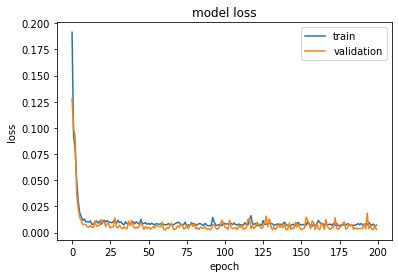

In [444]:
predictions = new_model.predict(xtest_scale)
print(history.history.keys())
print(history.history.get('acc')[-1])
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.yscale('log')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.show()

In [ ]:
predictions_transformed = scaler_y.inverse_transform(predictions)
# predictions_transformed2 = scaler_y.inverse_transform([predictions[50:100]])
# predictions_transformed3 = scaler_y.inverse_transform([predictions[100:]])
predicted_data = pd.DataFrame(predictions_transformed)
predicted_data.columns = ['pe', 'temp']
# print(y_test)
#calculating accuracy
hits = 0
i = 0
print(y_test.shape)
for index, row in y_test.iterrows():
  lower_limit = row['potential']-error_bars_test.stdev_pe[index]
  upper_limit = row['potential']+error_bars_test.stdev_pe[index]
  #print("\n upper limit:",upper_limit," lower limit:",lower_limit," prediction:",predicted_data.pe[i])
  if predicted_data.pe[i] > lower_limit and predicted_data.pe[i] < upper_limit:
    # print(" hit")
    hits += 1
  i+=1

acc = hits/(i)
print("Accuracy:",acc*100, "% hits:", hits, " ", i)

    potential   temp
13     -3.466  0.669
25     -3.585  0.748
46     -3.684  0.814
54     -3.846  0.915
10     -3.500  0.692
41     -3.650  0.791
48     -3.665  0.801
75     -4.693  1.219
33     -3.607  0.763
18     -3.530  0.712
60     -4.098  1.057
9      -3.494  0.687
72     -4.576  1.221
37     -3.642  0.786
56     -3.934  0.968
23     -3.581  0.745
82     -4.983  1.144
30     -3.614  0.768
           pe      temp
0  -20.606756  1.251423
1  -20.652763  1.259789
2  -20.880787  1.303246
3  -21.356384  1.328380
4  -20.606756  1.251423
5  -20.832184  1.292416
6  -20.899651  1.307627
7  -23.321104  1.407984
8  -20.742474  1.276103
9  -20.606756  1.251423
10 -21.917732  1.351124
11 -20.606756  1.251423
12 -23.040430  1.396612
13 -20.787329  1.284260
14 -21.543501  1.335962
15 -20.630335  1.255710
16 -23.976011  1.434518
17 -20.708832  1.269985


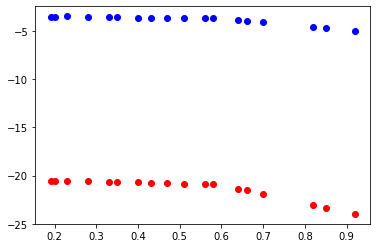

In [445]:
plt.plot(x_test,predicted_data.pe,"ro")
plt.plot(x_test,y_test.potential,"bo")
plt.errorbar(x_test, predicted_data.pe, yerr =error_bars_test.stdev_pe, fmt=" ")
plt.legend(['Predicted rho','Actual rho'], loc='upper right')
plt.title('density Vs potential energy')
plt.show()